In [ ]:
print("Hello, Shivraj! Your notebook is working 🎉")


Hello, Shivraj! Your notebook is working 🎉


In [1]:
import yfinance
print("✅ yfinance is working now")


✅ yfinance is working now


C:\Users\sghat\AppData\Local\Temp\ipykernel_28640\1534173406.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2000-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  10 of 10 completed


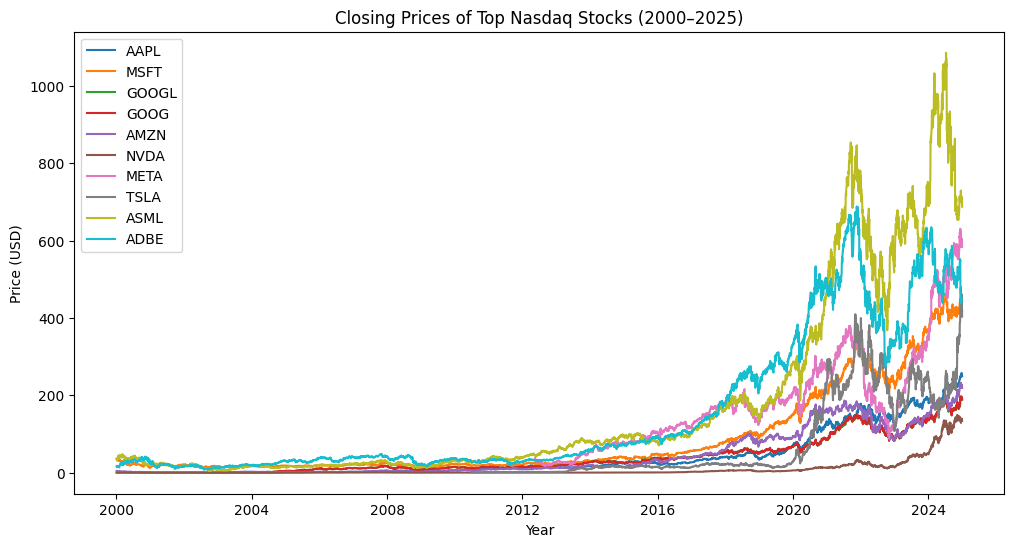

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["AAPL", "MSFT", "GOOGL", "GOOG", "AMZN", "NVDA", "META", "TSLA", "ASML", "ADBE"]

data = yf.download(tickers, start="2000-01-01", end="2025-01-01")['Close']

plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title("Closing Prices of Top Nasdaq Stocks (2000–2025)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()
data.to_csv("../data/nasdaq_top10_2000_2025.csv")
print("✅ Data saved to data/nasdaq_top10_2000_2025.csv")

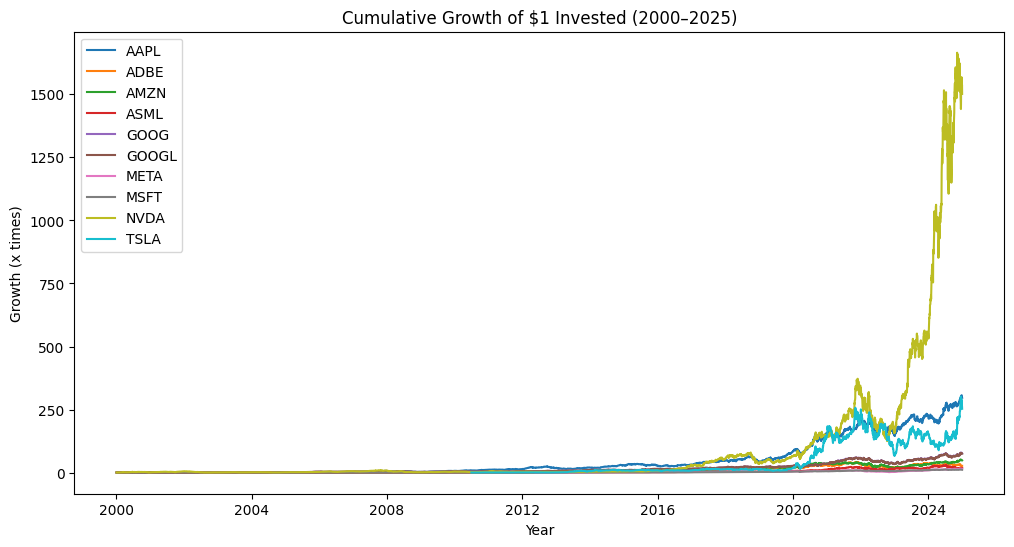

Performance Summary (2000–2025):
        Annual Return  Annual Volatility  Sharpe Ratio
Ticker                                                
TSLA            0.546              0.574         0.951
NVDA            0.469              0.594         0.789
AAPL            0.306              0.387         0.791
META            0.296              0.399         0.744
AMZN            0.276              0.494         0.559
GOOG            0.260              0.306         0.849
GOOGL           0.259              0.306         0.847
ADBE            0.223              0.425         0.526
ASML            0.220              0.453         0.486
MSFT            0.144              0.302         0.478


In [3]:
import numpy as np

# Step 1: Calculate daily percentage returns
returns = data.pct_change()

# Step 2: Calculate cumulative returns (growth of $1)
cumulative_returns = (1 + returns).cumprod()

# Step 3: Plot cumulative returns
plt.figure(figsize=(12,6))
for ticker in returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)
plt.title("Cumulative Growth of $1 Invested (2000–2025)")
plt.xlabel("Year")
plt.ylabel("Growth (x times)")
plt.legend()
plt.show()

# Step 4: Compute performance metrics
trading_days = 252  # average trading days per year
annual_returns = returns.mean() * trading_days
annual_volatility = returns.std() * np.sqrt(trading_days)
sharpe_ratio = annual_returns / annual_volatility  # risk-adjusted return

# Step 5: Combine into one DataFrame
metrics = pd.DataFrame({
    "Annual Return": annual_returns,
    "Annual Volatility": annual_volatility,
    "Sharpe Ratio": sharpe_ratio
}).sort_values("Annual Return", ascending=False)

print("Performance Summary (2000–2025):")
print(metrics.round(3))


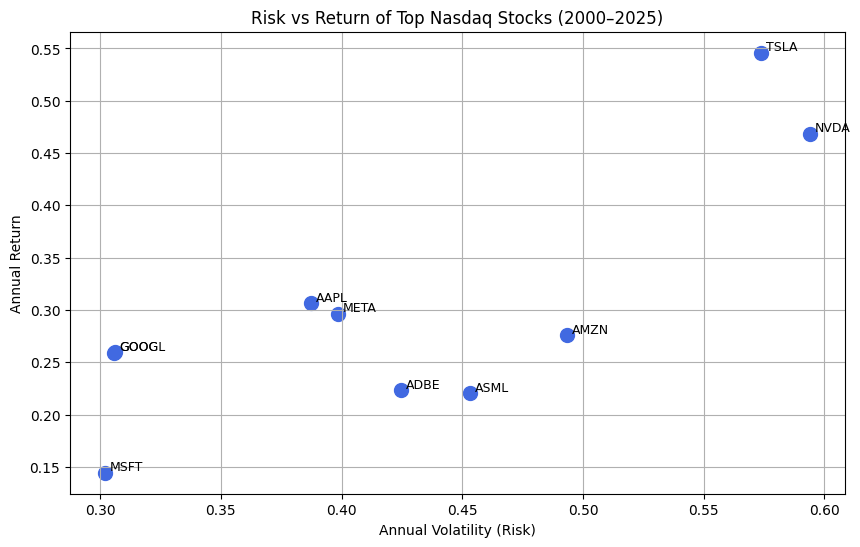

In [4]:
# Step 1: Create a scatter plot of risk vs return
plt.figure(figsize=(10,6))
plt.scatter(metrics["Annual Volatility"], metrics["Annual Return"], s=100, color='royalblue')

# Step 2: Add labels (tickers) next to each dot
for i in metrics.index:
    plt.text(metrics.loc[i, "Annual Volatility"] + 0.002,
             metrics.loc[i, "Annual Return"] + 0.002,
             i, fontsize=9)

# Step 3: Add titles and axis labels
plt.title("Risk vs Return of Top Nasdaq Stocks (2000–2025)")
plt.xlabel("Annual Volatility (Risk)")
plt.ylabel("Annual Return")
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Drop any missing data
returns = returns.dropna()

# Calculate average annual returns and covariance matrix
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Number of portfolios to simulate
num_portfolios = 10000

# Empty lists for results
port_returns = []
port_volatility = []
sharpe_ratios = []
port_weights = []

# Risk-free rate (for Sharpe ratio) — assume 4% annual
risk_free_rate = 0.04

# Monte Carlo Simulation
for _ in range(num_portfolios):
    weights = np.random.random(len(returns.columns))
    weights /= np.sum(weights)
    port_weights.append(weights)
    
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (portfolio_return - risk_free_rate) / portfolio_volatility
    
    port_returns.append(portfolio_return)
    port_volatility.append(portfolio_volatility)
    sharpe_ratios.append(sharpe)

# Convert results to DataFrame
portfolio_results = pd.DataFrame({
    'Return': port_returns,
    'Volatility': port_volatility,
    'Sharpe Ratio': sharpe_ratios
})


In [7]:
# Find max Sharpe and min volatility portfolios
max_sharpe_port = portfolio_results.iloc[portfolio_results['Sharpe Ratio'].idxmax()]
min_vol_port = portfolio_results.iloc[portfolio_results['Volatility'].idxmin()]

print("Max Sharpe Ratio Portfolio:\n", max_sharpe_port)
print("\nMin Volatility Portfolio:\n", min_vol_port)


Max Sharpe Ratio Portfolio:
 Return          0.427339
Volatility      0.296180
Sharpe Ratio    1.307785
Name: 9290, dtype: float64

Min Volatility Portfolio:
 Return          0.266782
Volatility      0.233795
Sharpe Ratio    0.970003
Name: 4663, dtype: float64


C:\Users\sghat\AppData\Local\Temp\ipykernel_28640\2497443468.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(max_sharpe_port[1], max_sharpe_port[0], color='r', marker='*', s=200, label='Max Sharpe')
C:\Users\sghat\AppData\Local\Temp\ipykernel_28640\2497443468.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], color='b', marker='*', s=200, label='Min Volatility')


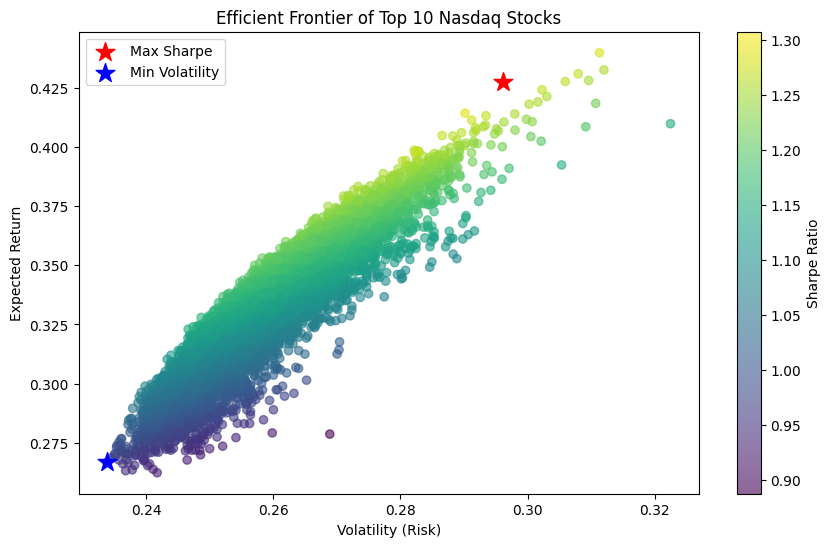

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(portfolio_results['Volatility'], portfolio_results['Return'], 
            c=portfolio_results['Sharpe Ratio'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier of Top 10 Nasdaq Stocks')

# Highlight best portfolios
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], color='r', marker='*', s=200, label='Max Sharpe')
plt.scatter(min_vol_port[1], min_vol_port[0], color='b', marker='*', s=200, label='Min Volatility')
plt.legend()
plt.show()


In [9]:
best_weights = pd.DataFrame(port_weights[portfolio_results['Sharpe Ratio'].idxmax()],
                            index=returns.columns,
                            columns=['Weight'])
print("Optimal Portfolio Weights (Max Sharpe):")
print(best_weights.round(3))


Optimal Portfolio Weights (Max Sharpe):
        Weight
Ticker        
AAPL     0.125
ADBE     0.013
AMZN     0.144
ASML     0.010
GOOG     0.035
GOOGL    0.027
META     0.058
MSFT     0.099
NVDA     0.305
TSLA     0.184


In [10]:
portfolio_results.to_csv("../data/portfolio_simulation_results.csv")
print("✅ Portfolio simulation saved to data/portfolio_simulation_results.csv")


✅ Portfolio simulation saved to data/portfolio_simulation_results.csv
